In [42]:
#IMPORTS 
import sys
import numpy as np
import matplotlib.pyplot as plt
#sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")
sys.path.append(r"C:\Users\EmilR\Documents\GitHub\MoleculeSim\ownSim")

#import forces as fc
import molecules as mc
import img3dto2d as i32
import util
#import random
#import copy
#from tqdm import tqdm

In [43]:
def old_load(name):
  with open(name, 'rb') as f:
    poss = np.load(f)
    radii = np.load(f)
  return poss, radii

In [44]:
# load radius and all molecule positions
filename = "simV3R_100_3800_bf5b8.npy"
filename_split = filename.split("_")
points, radii= old_load(filename)



num_frames = int(filename_split[1])

#image values
image_size = np.array([int(filename_split[2]),int(filename_split[2])])
sigma_scale = 4 #gauss values
frames = [0,len(points) - 1] #select frames to plot
print("frames:" , num_frames, "molecules: ", len(points[0])  ," image size:", image_size)

frames: 100 molecules:  1000  image size: [3800 3800]


In [45]:
plot = False
animate = True

In [46]:
if plot:
  #plot frames
  imgs_gauss = []
  imgs_fill = []

  plt.figure(figsize=(8,16))
  for i,f in enumerate(frames):
    _p2dr = list(zip(np.array(points[f])[:,:2],radii))
    
    plt.subplot(len(frames),2,(i)*2+1)
    plt.title(f"Fill - Frame: {f}")
    _img_fill = i32.get_3d_to_2d_img(_p2dr,image_size)
    plt.imshow(_img_fill,cmap="gray")

    plt.subplot(len(frames),2,(i)*2+2)
    plt.title(f"Gauss - Frame: {f}")
    _img_gauss = i32.get_3d_to_2d_img_gauss(_p2dr,image_size,sigma_scale)
    plt.imshow(_img_gauss,cmap="gray")

    imgs_fill.append(_img_fill)
    imgs_gauss.append(_img_gauss)

  plt.show()

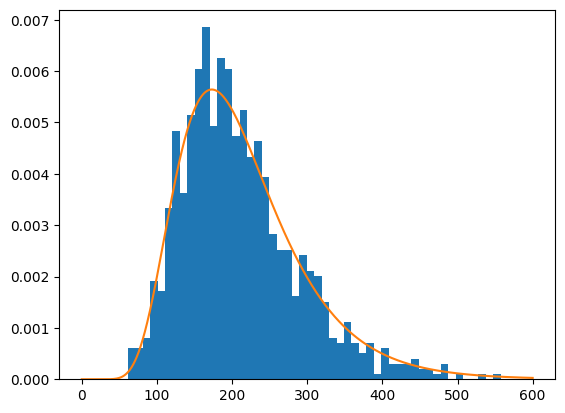

In [47]:
x = np.linspace(0.1,600, 1000)
res = [util.pdf(i) for i in x]

plt.figure()
plt.hist(radii * 2,bins = 50, density = True)
plt.plot(x,res)
plt.show()

In [48]:
#apply video stuff
#mayavi visualize
from __future__ import absolute_import, division, print_function
from mayavi import mlab
import numpy as np
import math

num_molecules = len(points[0])
box_size = np.array([3800,3800,3800])
max_radius = max(radii)
print(max_radius)
if animate:

	xs = np.array([inner_list[0] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
	ys = np.array([inner_list[1] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
	zs = np.array([inner_list[2] for sublist in points for inner_list in sublist]).reshape((num_frames,num_molecules))
	mlab.clf()
	#mlab.points3d(0,0,0)

	# plt = mlab.points3d([0], [0], [0], resolution = 100, scale_factor = 100*2)
	# plt = mlab.points3d([300], [0], [0], resolution = 100, scale_factor = 200*2)
	#plt = mlab.points3d(points[0][:, 0], points[0][:, 1], points[0][:, 2], resolution = 10, scale_factor = radius*2)
	plt = mlab.points3d(points[0][:, 0], points[0][:, 1], points[0][:, 2], radii*2, resolution = 10, scale_mode = "scalar", scale_factor = 1)
	mlab.axes(extent = [0,box_size[0],0,box_size[1],0,box_size[2]])#ranges = [-100,500,-200,200,-200,200]
	text_position = (0,0,0)
	text_actor = mlab.text3d(500,150, 510, "TESTING", scale = 40, color = (0,0,0))
	@mlab.animate(delay = 100, ui = True, support_movie = True) #delay = 100
	def anim():
		f = mlab.gcf()
		while True:
			#temp = "step: "
			for step in range(len(xs)):#num_steps
				x = xs[step]#points[step][:, 0]
				y = ys[step]#points[step][:, 1]
				z = zs[step]#points[step][:, 2]
				plt.mlab_source.set(x=x, y=y, z=z)
				# for i in range(num_molecules):
  			# 		plt[i].mlab_source.set(x=x[i], y=y[i], z=z[i])
				text_actor.text = f"Frame: {step}"
				
				yield


	anim()
	mlab.show()

278.6379651443774


In [49]:
# mlab.clf()


# plt2 = mlab.points3d([0, 300], [0,0], [0,0], [200,400], scale_factor = 1, resolution = 100, scale_mode = "scalar") #scale_factor = max_radii, scale_mode = "scalar"
# mlab.axes(extent = [-100,100,-100,100,-100,100])
# mlab.show()

: 